Load necessary libraries.

In [1]:
### Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import os

### ML packages
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering #Hierarchial Clustering
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from collections import defaultdict
import umap
from sklearn.metrics import silhouette_samples

### Msc
import warnings

### OOP
from ml_utils import SilhouetteEvaluator, ClusterEvaluator

Load dataset.

In [2]:
df = pd.read_csv('00_authors.csv').rename(columns = {'Unnamed: 0': 'Author'}).drop(columns = 'BookID')
X = df.copy().drop(['Author'], axis=1)
X = X.to_numpy() # change pd.DataFrame to np.ndarray
authors = df['Author'].values  # n_samples-length array

UMAP Dimensional Reduction!

In [3]:
warnings.filterwarnings("ignore", category=UserWarning, module="umap") # Suppress the specific UMAP warning on parralelism
umap_model = umap.UMAP(n_neighbors=10, min_dist=0.3)
X_umap = umap_model.fit_transform(X)

Now we will validate the methods from notebook 04 based on stability rather than using the author labels as this is what aligns with these unsupervised methods (if we have the author labels we would use supervised learning)! 

# Silhouette Score

The method with the highest silhouette score generalizes best!

## Kmeans++

Kmeans++ with and without UMAP:

Kmeans++ without dimension reduction:
The scores across K = {2: 0.2639616657056025, 3: 0.20836751818875782, 4: 0.1896923268152257, 5: 0.19190802908529894, 6: 0.16849800851686955, 7: 0.15668097646657972, 8: 0.15817746401629787, 9: 0.13613451132150697, 10: 0.1323837470119525}
Best K: 2
Kmeans++ with dimension reduction (UMAP):
The scores across K = {2: 0.6579752, 3: 0.70585626, 4: 0.7211634, 5: 0.61774284, 6: 0.56564015, 7: 0.57764244, 8: 0.5139153, 9: 0.5119281, 10: 0.46807265}
Best K: 4


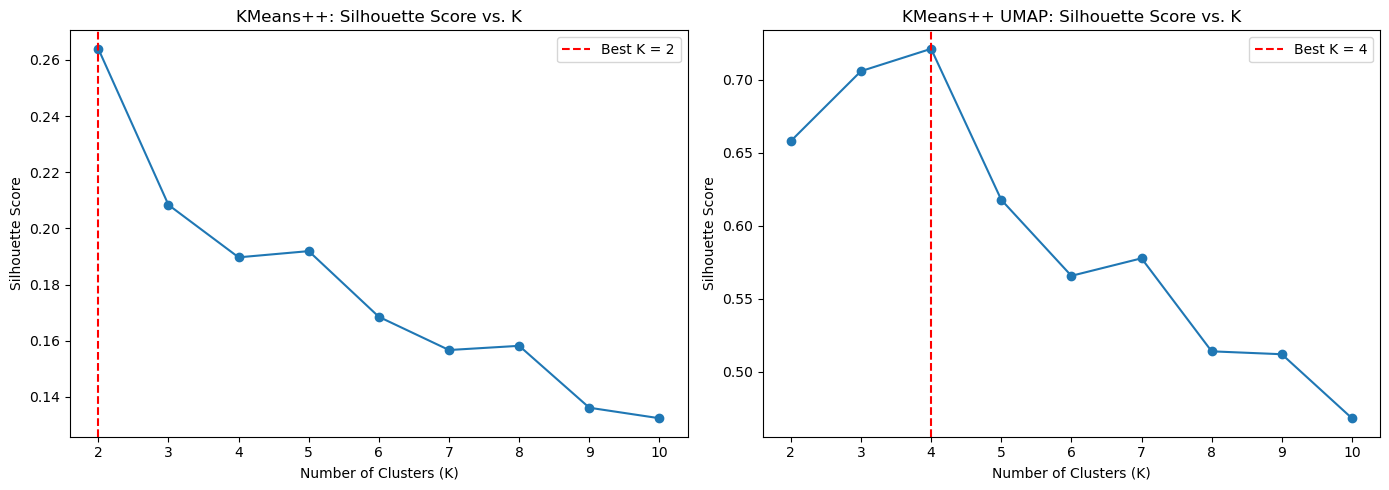

In [29]:
# Kmeans++ 
print('\033[1m' + 'Kmeans++ without dimension reduction:' + '\033[0m')
evaluator_kmeans = SilhouetteEvaluator(X, KMeans, k_range=range(2, 11), init='k-means++', n_init=10, max_iter=300)
scores, best_k = evaluator_kmeans.evaluate()
print(f'The scores across K = {scores}')
print(f"Best K: {best_k}")

# Kmeans++ with UMAP
print('\033[1m' + 'Kmeans++ with dimension reduction (UMAP):' + '\033[0m')
evaluator_kmeans_umap = SilhouetteEvaluator(X_umap, KMeans, k_range=range(2, 11), init='k-means++', n_init=10, max_iter=300)
scores, best_k = evaluator_kmeans_umap.evaluate()
print(f'The scores across K = {scores}')
print(f"Best K: {best_k}")

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
evaluator_kmeans.plot("KMeans++", ax=axs[0])
evaluator_kmeans_umap.plot("KMeans++ UMAP", ax=axs[1])
plt.tight_layout()
plt.show()